In [0]:
!pip install ggplot
import numpy as np
import pandas as pd
from functools import reduce # to handle many dataframes
from ggplot import *

    100% |████████████████████████████████| 2.2MB 6.9MB/s 


/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


I moved to Georgia two and a half year ago, right before the 2016 Presidential Election.  As a transplant, the politics of Georgia have continued to interest and confound me.  Everyone knows that because it is in the south, Georgia must be heavily Republican, right?  If you look at how Georgia has voted in Presidential elections, that would seem like a fair conclusion – it has only voted Democrat once in the last 8 presidential elections.  In the State Government, Republicans have held the House, Senate, and Governorship for over fifteen years running. However, polls have consistently put the difference in support between Democrats and Republics at under 5%.  What accounts for this discrepancy?  Putting aside typical issues like gerrymandering, Georgia has recently attracted national attention for its other voter suppression methods and election inconsistencies.  Major questions were raised after the 2016 election about the security of the electronic voting machines used and the lack of any paper ballots as a form of double-checking. I want to examine how different counties voting patterns differ with respect to race and income measures.

First I imported demographic, income, and voting data.

In [0]:
# import the data from GitHub
demographics = pd.read_csv("https://github.com/willcuratolo/pandas_project/blob/688eb3dad5c34133b2b0e2dbdc77972e6108f398/georgia_demographics.csv?raw=TRUE")
voters = pd.read_csv("https://github.com/willcuratolo/pandas_project/blob/688eb3dad5c34133b2b0e2dbdc77972e6108f398/georgia_voters.csv?raw=TRUE", skiprows = 8)
income = pd.read_csv("https://github.com/willcuratolo/pandas_project/blob/688eb3dad5c34133b2b0e2dbdc77972e6108f398/georgia_income.csv?raw=TRUE")

Then I cleaned up some of the data so I could combine them all into one dataframe.

In [0]:
# drop 'total' rows
demographics = demographics.drop([0])
voters = voters.drop([len(voters)-1])

In [0]:
# create a uniform county name column
demographics['name'] = demographics['Region'].str.replace(" County", "").str.upper()
income['name'] = income['region'].str.replace(" County", "").str.upper()
voters['name'] = voters['COUNTY NAME']

In [0]:
# drop unused columns
demographics = demographics.drop(columns = ['Region'])
voters = voters.drop(columns = ['COUNTY ID', 'COUNTY NAME', 'Unnamed: 24'])
income = income.drop(columns = ['region'])

In [0]:
# put data frames in one list
data_list = [demographics, voters, income]

# joint all data
ga_data = reduce(lambda df_1,df_2: pd.merge(df_1, df_2, on='name', how='inner'), data_list)

Next I calculated the percentage of voters as a whole for each county.

In [0]:
# calculate pct of voters
ga_data['total_pop'] = ga_data['Total population'].str.replace(',', '').astype(int)
ga_data['voter_pct'] = ga_data['TOTAL VOTERS'] / ga_data['total_pop']



In [0]:
# back into race demographic counts
x1 = 'white_pop'
x2 = 'white_pct'

for x1,x2 in [('white_pop', 'white_pct'), ('black_pop', 'black_pct'),
              ('asian_pop', 'asian_pct'), ('ai_pop', 'ai_pct'),
             ('other_pop', 'other_pct')]:
  ga_data[x1] = ((ga_data['total_pop'] * ga_data[x2]) / 100).astype(int)

I had a breakdown of each county's racial percentages, but I wanted a count - so I had to back into that. Then I summed the total voters for each race in each county.

In [0]:
# compute voter race counts
ga_data['ai_voters'] = ga_data.iloc[:,11:14].sum(axis=1)
ga_data['asian_voters'] = ga_data.iloc[:,14:17].sum(axis=1)
ga_data['black_voters'] = ga_data.iloc[:,17:20].sum(axis=1)
ga_data['white_voters'] = ga_data.iloc[:,23:26].sum(axis=1)
ga_data['other_voters'] = ga_data.iloc[:,26:29].sum(axis=1)
ga_data['total_voters'] = ga_data['TOTAL VOTERS']


Finally, I calculated the voting percentage of each race.

In [0]:
# calculate voter percentage
for x in ['white', 'black', 'asian', 'ai', 'other', 'total']:
  ga_data[x+'_voter_pct'] = ga_data[x+'_voters'] / ga_data[x+'_pop']

AttributeError: ignored

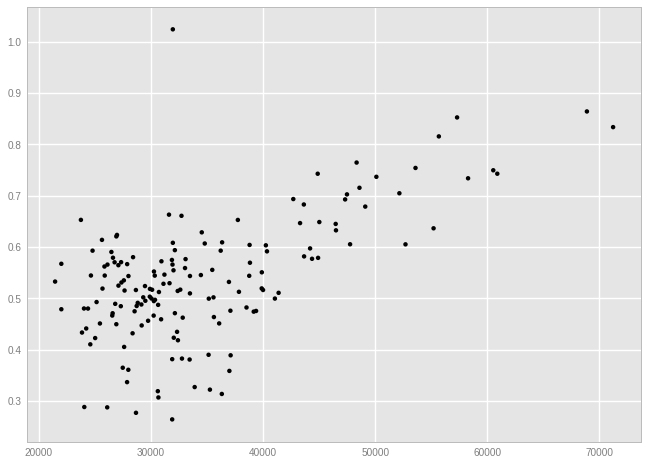

In [0]:
# make plots
ggplot(aes(x = 'median_household_income', y = 'black_voter_pct'), data = ga_data[['median_household_income','black_voter_pct']]) +\
  geom_point() +\
  stat_smooth(colour='blue', span=0.2)
  
gzgplot(aes(x = 'median_household_income', y = 'white_voter_pct'), data = ga_data) +\
  geom_point() #+\
  stat_smooth(colour='blue', span=0.2)

My two plots examine the effect of median household income on the voter registration percentages of black and white Georgians in each of Georgia’s counties.  In the first plot, it is clear that in counties with higher household incomes black citizens are registered to vote at higher rates.  However, in the second plot, one can observe that registration rates of white voters vary very little in counties with high or low income.  One hypothesis to explain this is that when considered as a whole, black voters lean democratic, regardless of income.  However, at least in Georgia, poor white voters are even more likely to vote Republican (https://www.cnn.com/election/2016/results/exit-polls/georgia/president).  Thus focusing on suppressing the votes of poor black voters would be an effective way to ensure Republican success.  Of course, this is only one insight gleaned from a goldmine of election data.